# Is The USA Disproportionetly Affecting the World's Carbon Emissions?

## Building a Model that Explains the Economic Trade-off Between Growth and Protection

### Introduction

Carbon emissions makeup about 80% of the total harmful greenhouse gasses that are emitted by humans into the atmosphere. This leads to the greenhouse effect and the planet's temperature that is rising. The simplistic answer would be to reduce the amount of GHGs emitted via command and control, but this does not take into account economic variables.

This analysis will answer if the USA is disproportionately affecting the world's carbon emissions. 

The simplistic answer is yes. The United States produced around 15.5 metric tons per capita. However, only looking at the emmissions per capita can be misleading. A country can emit large amounts of CO2, but can also be actively developing and investing in methods to reduce emissions. Typically, only countries that are more developed have the means to invest in carbon emission reduction. This analysis will take into account emissions, as well as the nature of a given country's economy. 

All data will be viewed as per capita because it gives better insight to how the economy functions outside of nominal values.

### Datasets

Datasets for GDP per capita and carbon emissions per capita will be pulled from https://data.worldbank.org/. This data is from 2019.

The data for GDP per capita and carbon emissions per capita overtime were pulled from https://www.macrotrends.net/. 

I formatted the data in Excel to make indexing simpler.

In [72]:
# showing the df
import pandas as pd
pd.read_csv('data.csv')
data.set_index('Country Name')

,Metric Tons Per Capita in2019,AGEP(Y) Score [1/CE],GDP per capita 2019
Country Name,,,
Africa Eastern and Southern,0.91,1.09,1511.31
Afghanistan,0.16,6.26,494.18
Africa Western and Central,0.49,2.02,1777.85
Angola,0.79,1.26,2177.80
Albania,1.69,0.59,5396.22
...,...,...,...
Samoa,1.52,0.66,4322.87
"Yemen, Rep.",0.38,2.63,750.55
South Africa,7.51,0.13,6624.76


### Defining Terms

- Environmental Protection Score (EP) - a method of quantifying how much a country protects the environment compared to other countries. This is obtained by taking (1/Carbon Emissions per Capita)
- Production Possibilities Frontier (PPF) - a graph that shows the trade off between two goods, in this case we are looking at the trade off between environmental protection per capita and GDP per capita
- Aggregate Environmental Protection as a function of GDP per capita (AGEP(Y)) - function that shows the trend the world as a whole faces between of the trade off between EP per capita and GDP per capita
- Short run Environmental Protection as a function of GDP per capita (SREP(Y)) - function that shows the short term trade off between EP per capita and GDP per capita for a single country. This is found by taking the tangent line of the AGEP(Y) for a country's level of GDP per capita
- Long run Environmental Protection as a function of time (LREP(t)) - a function that shows the over trend of EP per capita over time
- Gross Domestic Product (GDP) - a country's level of economic output a.k.a how many goods and services they produce in a year

### Method

The method will be as follows:
1. Find the AGEP(Y)
2. Use the AGEP(Y) to find the SREP(Y) by using the derivative of the AGEP(Y) at each country's level of output
3. Derive the LREP(t) curve by plotting many SREP(Y) curves over for each year
4. Compare the LREP(t) of the United States to other countries to see how the United States economy is function compared to other countries

In [73]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import geopandas as gpd

In [74]:
# excel to pandas
data = pd.read_csv('data.csv')

In [75]:
# assigning variables for the AGEP(Y) scatter
EnvPro = data['AGEP(Y) Score [1/CE]']
country = data['Country Name']
gdppc = data['GDP per capita 2019']

### Step 1: Deriving the AGEP(Y) curve

Recall the AGEP(Y) shows the overall trend of the trade off the entire world faces between environmenal protection per capita and economic output per capita. By plotting all countries with their EP/c and GDP/c as Y and X respectively, we can find their trendline a.k.a then AGEP(Y) function.

Text(10000, 3, 'The bleck trend line shows the AGEP(Y) function.\nThis shows the overall trend that the world faces.')

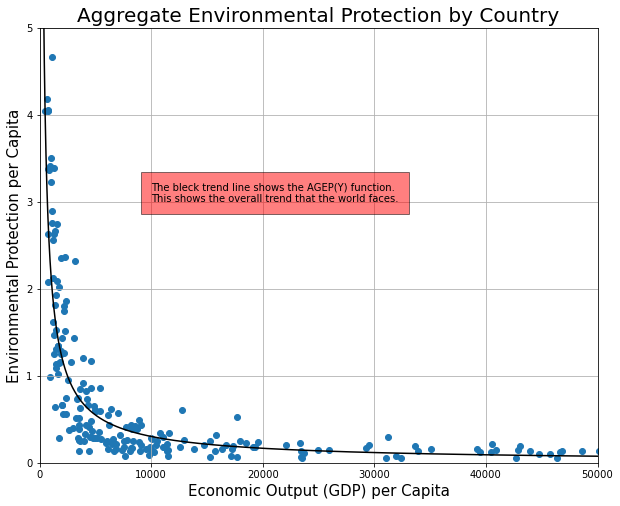

In [76]:
# create the plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(gdppc, EnvPro)

# set plot bounds, will distort if not set
plt.xlim(0,50000)
plt.ylim(0,5)

# plotting the trendline
trend_x = np.arange(1,150001)
trend_y = 842.09*trend_x**(-0.861)
trendline = plt.plot(trend_x,trend_y,color='black')
plt.grid()


# axes labels and titles
ax.set_title('Aggregate Environmental Protection by Country',size=20)
ax.set_xlabel('Economic Output (GDP) per Capita',size=15)
ax.set_ylabel('Environmental Protection per Capita',size=15)

# text
ax.text(10000, 3, 'The bleck trend line shows the AGEP(Y) function.\nThis shows the overall trend that the world faces.',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

### What we can tell from the figure

Some observations of the curve:
1. The most important observation is that it is non-linear, which means that if a country wants to increase their environmental protection by decreasing their economic output, they would have to drop their GDP/c to $5000 or below to make a significant difference
2. As a country moves from undeveloped to developed, they're environmental protection drops rapidly. This makes sense considering the nature of developing countries and industrial economies.
3. Because the curve bows in towards the origin, there is decreasing opportunity cost when trading off between the two goods 

### Step 2. Deriving the SREP(Y)

Below is an interactive graph. If you enter a country name inside the single quotes with proper form, it will return the countries GDP/capita, their Environmental Protection score, their individual rate of substitution, and a visualization of the country shown in red, compared to the PPF

United States has a GDP per Capita of $65094.8
United States has an Environmental Protection score of 0.07
United States has a rate of substitution equal to 7.986417372227736e-07


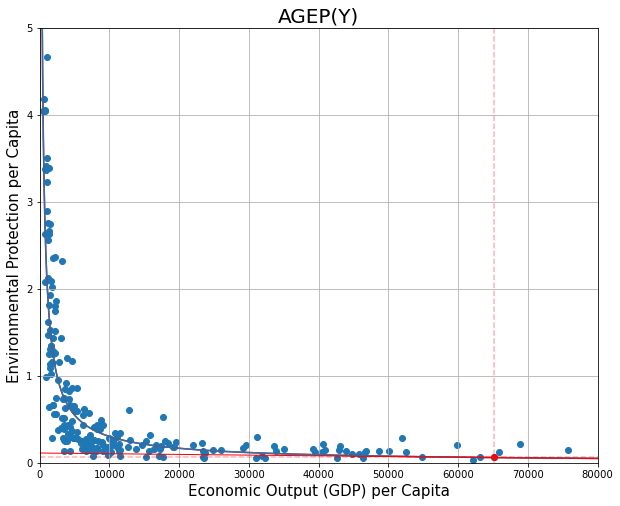

In [77]:
#---interactivity-----------------------------------------------------------------------------------------------------------
# format inside single quotes with proper capitilization
# this returns their GDP per capita and their envronmental protection score



enter_country = 'United States' 



#---------------------------------------------------------------------------------------------------------------------------
# function that returns the GDP per capita from entering the country name
def coordinate(country):
    country_index = data.set_index('Country Name')
    gdppc = country_index._get_value(country,'GDP per capita 2019', takeable=False)
    EP = country_index._get_value(country,'AGEP(Y) Score [1/CE]', takeable=False)
    return (gdppc,EP)

# define the trendline function
def f(x):
    return 842.09*x**(-0.861)

# Define function derivative
def slope(x): 
    return -72503949/(100000*x**(1861/1000))

# Define x data range for ppf
x = trend_x

# Choose point to plot tangent line
# enter country name for X1 in order to plot the relative tangent line
x1 = coordinate(enter_country)[0]
y1 = f(x1)

# Define tangent line
# y = m*(x0 - x1) + y1
def line(x, x1, y1):
    return slope(x1)*(x - x1) + y1
#----------------------------------------------------------------------------------------------------------------------------
# create the plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(gdppc, EnvPro)

# plotting the regression
trend_x = np.arange(1,150001)
trend_y = 842.09*trend_x**(-0.861)
trendline = plt.plot(trend_x,trend_y,color='red')
plt.grid()

# plotting a tanget line
plt.plot(x,f(x))
tangent = plt.plot(x, line(x, x1, y1), linewidth = 1,color='red')


# set plot bounds, will distort if not set
plt.xlim(0,80000)
plt.ylim(0,5)

# highlight the point for the selected country
ax.scatter(coordinate(enter_country)[0], coordinate(enter_country)[1], color='red')

# lines through the point of the entered country
ax.axvline(coordinate(enter_country)[0],color='red',alpha=0.3,linestyle='--')
ax.axhline(coordinate(enter_country)[1],color='red',alpha=0.3,linestyle='--')

# axes labels and titles
ax.set_title('AGEP(Y)',size=20)
ax.set_xlabel('Economic Output (GDP) per Capita',size=15)
ax.set_ylabel('Environmental Protection per Capita',size=15)

print(enter_country + " has a GDP per Capita of " + "$" + str(coordinate(enter_country)[0]))
print(enter_country + " has an Environmental Protection score of " + str(coordinate(enter_country)[1]))
print(enter_country + " has a rate of substitution equal to " + str(abs(slope(x1))))

### The Tangent Line

* Each country has their own tangent line that represents their SREP(Y)
* The tangent line shows the country's rate of substitution between the two goods

Text(0.5, 0, 'GDP per Capita')

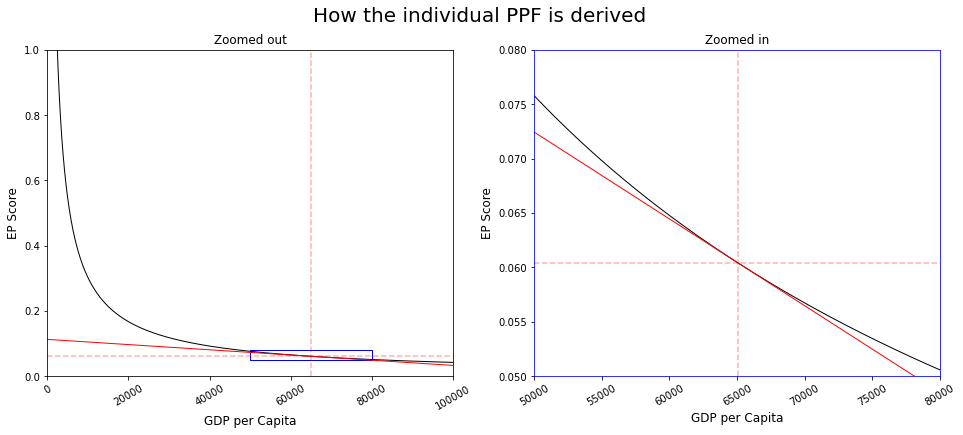

In [78]:
# function that returns the GDP per capita from entering the country name
def coordinate(country):
    country_index = data.set_index('Country Name')
    gdppc = country_index._get_value(country,'GDP per capita 2019', takeable=False)
    EP = country_index._get_value(country,'AGEP(Y) Score [1/CE]', takeable=False)
    return (gdppc,EP)

# define the trendline function
def f(x):
    return 842.09*x**(-0.861)

# Define function derivative
def slope(x): 
    return -72503949/(100000*x**(1861/1000))

# Define variables
x = np.arange(1,150000) 
x1 = coordinate('United States')[0] 
y1 = f(x1) 
#----------------------------------------------------------------------------------------------------------------------------
# building the individual PPF for the United States

# creating the plot
fig, ax = plt.subplots(1,2,figsize=(16,6), sharey=False)

# Define tangent line
# y = m*(x0 - x1) + y1
def line(x, x1, y1):
    return slope(x1)*(x - x1) + y1

# setting overall title

# plotting origional PPF
ax[0].plot(x,f(x), linewidth = 1, color = 'black')
ax[0].plot(x, line(x, x1, y1), linewidth = 1,color='red')
ax[0].set_xlim(0,100000)
ax[0].set_ylim(0,1)
ax[0].tick_params(axis="x", which="major", rotation=30)
ax[0].set_title('Zoomed out')

# reference lines for subplot 1
ax[0].axvline(coordinate('United States')[0],color='red',alpha=0.3,linestyle='--')
ax[0].axhline(y1,color='red',alpha=0.3,linestyle='--')

# coloring subplot 2
ax[1].spines['bottom'].set_color('blue')
ax[1].spines['top'].set_color('blue')
ax[1].spines['left'].set_color('blue')
ax[1].spines['right'].set_color('blue')
        
# plotting tangent line zoomed in
ax[1].plot(x,f(x), linewidth = 1, color = 'black')
ax[1].plot(x, line(x, x1, y1), linewidth = 1,color='red')
ax[1].set_xlim(50000,80000)
ax[1].set_ylim(0.05,0.08)
ax[1].tick_params(axis="x", which="major", rotation=30)
ax[1].set_title('Zoomed in')

# reference lines for subplot 2
ax[1].axvline(coordinate('United States')[0],color='red',alpha=0.3,linestyle='--')
ax[1].axhline(y1,color='red',alpha=0.3,linestyle='--')

# plotting the rectangle
rect = patches.Rectangle((50000, 0.05), 30000, 0.03, linewidth=1, edgecolor = 'blue', facecolor='none')
ax[0].add_patch(rect)

# sup title
fig.suptitle('How the individual PPF is derived', fontsize=20)

ax[0].set_ylabel('EP Score', fontsize=12)
ax[0].set_xlabel('GDP per Capita', fontsize=12)
ax[1].set_ylabel('EP Score', fontsize=12)
ax[1].set_xlabel('GDP per Capita', fontsize=12)

### Why use the tangent line as the individual PPF instead of the AGEP(Y)?

There are two reasons why the tangent line is used for the individual countries' PPFs. 

1. The model assumes that countries' GDP generally only grows. By definition, the PPF model states that a country can move anywhere along the curve and be considered efficient. However, the AGEP(Y) function is a special case because countries who are on the lower end of the GDP/capita spectrum are always aiming to grow their economy.

2. This is main reason. The model assumes that because countries only grow, in the short run, their resources are fixed. This is a hasty assumption but is reasonable considering a country cannot simply expand their economy by choice. They are constrained by their resources at a given point in time. This means that their tangent line, which represent's the individual country's rate of substitution between EP and GDP/capita is a choice made by the country at a fixed level of resouces at a single point in time. 

### Step 3. Deriving the LREP(t)

Recall the LREP(t) is the environmental protection as a function of time. Plotting an LREP(t) curve can be done by by plotting a country's EP/c on the Y-axis and year on the X-axis. 

Understanding how the LREP(t) is derived:
* The SREP(Y) shows the trade off between Environmental Protection and Economic output at a single point in time
* If we an SREP(Y) curve for every year, we will find the overall trend for a country's economy
    * This shows us that in the long run, a country can actually obtain more Environmental Protection AND more Economic ouput
* By following the trend we see that for most countries, economic output is always increasing, therefore, if we simply look at how the environmental protection changes overtime we can get a better understanding of how important protecting the environment is to a paticular country.

Below is a visual to explain the above statement

Text(85000, 0.07, 'How to read: \n\n As the line shifts up, the country faces long term economic growth. \n This is because as the country acquires more resources (that do not harm the environment) or build technology\n that reduces the amount of emissions, they can afford more of both EP and GDP, while maintaining the same rate\n of substitution.\n\n Each line represents a year of fixed resources for the country')

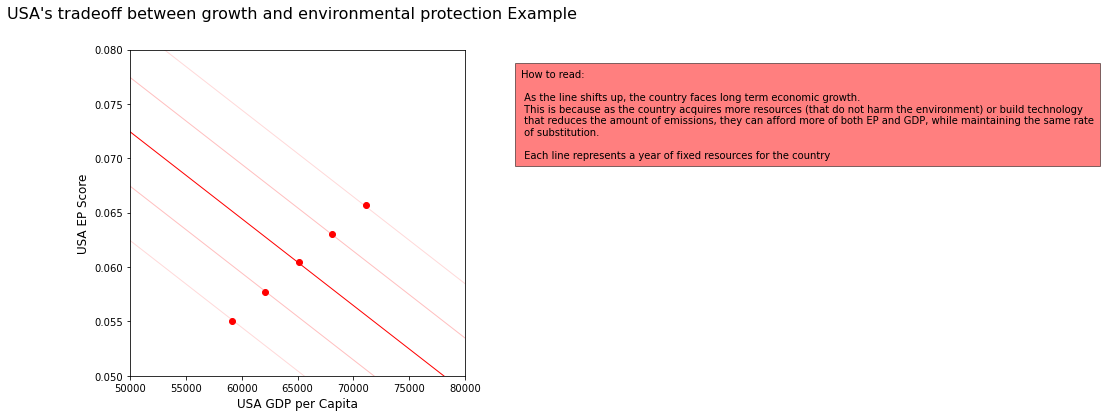

In [79]:
# plotting the USA's SREP(Y)
fig, ax = plt.subplots(figsize=(6,6))
plt.plot(x, line(x, x1, y1), linewidth = 1,color='red')

#lines above
plt.plot(x, line(x, x1, y1+0.005), linewidth = 1,color='red', alpha=0.25)
plt.plot(x, line(x, x1, y1+0.01), linewidth = 1,color='red', alpha=0.15)
#lines below
plt.plot(x, line(x, x1, y1-0.005), linewidth = 1,color='red', alpha=0.25)
plt.plot(x, line(x, x1, y1-0.01), linewidth = 1,color='red', alpha=0.15)

# USA coordinate
USA = coordinate('United States')

ax.scatter(USA[0], USA[1]-0.0095, color='red')

# hypothetic points above
ax.scatter(USA[0]+3000, USA[1]-0.007, color='red')
ax.scatter(USA[0]+6000, USA[1]-0.0043, color='red')

# hypothetical points below
ax.scatter(USA[0]-3000, USA[1]-0.0123, color='red')
ax.scatter(USA[0]-6000, USA[1]-0.015, color='red')


ax.set_xlim(50000,80000)
ax.set_ylim(0.05,0.08)

fig.suptitle("USA's tradeoff between growth and environmental protection Example", fontsize=16)
ax.set_ylabel('USA EP Score', fontsize=12)
ax.set_xlabel('USA GDP per Capita', fontsize=12)

ax.text(85000, 0.07, 
        'How to read: \n\n As the line shifts up, the country faces long term economic growth. '
        '\n This is because as the country acquires more resources (that do not harm the environment) or build technology'
        '\n that reduces the amount of emissions, they can afford more of both EP and GDP, while maintaining the same rate'
        '\n of substitution.'
        '\n\n Each line represents a year of fixed resources for the country',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 6}, fontsize=10)

The above figure is an example of how plotting an SREP(Y) for each year can produce the LREP(t) function. 

In the short run, countries are bounded by their technology at a single point in time. In the long run, countries' technology develops and allows them to be more efficient. 

The line represents a given point in time a.k.a each line is a year. The line shifts up and to the right as the economy grows. This is intuitive. The economy grows when they develop technolgy that makes their labor and resources more efficient. In this case, things that would shift the line up and right are technologies that reduce emissions.

For example, a car in the 1980s was significantly less efficient and produced more emissions than a car today. 

Therefore, in the long run, we look at the trend among each coordinate to observe the country's long term environmental protection as a function of GDP, which is upward sloping.

### What the USA's trend actually looks like

The following figure shows what was shown above except with using actual data. Because it is upward sloping, it shows the USA economy is geared towards environmental protection in the long run.

In [80]:
# loading the carbon emissions over time dataset
ceot = pd.read_csv('USA CEOT.csv')

# defining a function that returns the coordinate for the ceot dataset
def ceot_coordinate(year):
    year_index = ceot.set_index('Year')
    gdppc = year_index._get_value(year,'GDPpC', takeable=False)
    CE = year_index._get_value(year,'Metric Tons Per Capita', takeable=False)
    EP = 1/CE
    return (gdppc,EP)

# defining EP outside the function
ceot_EP = (1/ceot['Metric Tons Per Capita'])

Text(0.5, 0, 'USA GDP per Capita')

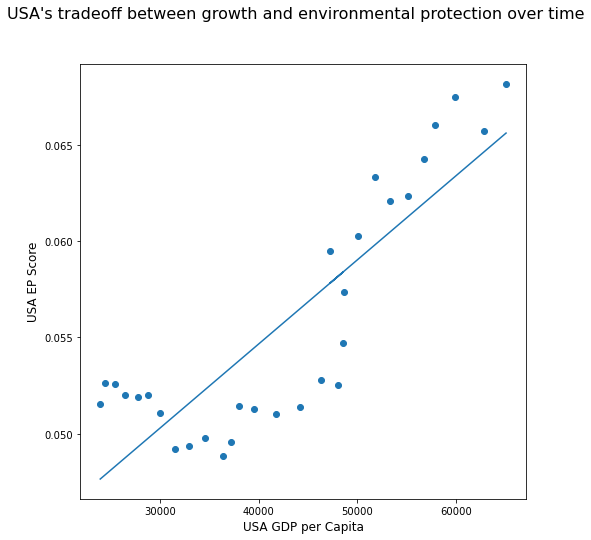

In [81]:
# plotting the USA's SREP(Y)
fig, ax = plt.subplots(figsize=(8,8))

# plotting each point for each year
ax.scatter(ceot['GDPpC'], ceot_EP)

# plotting a regression line
m, b = np.polyfit(ceot['GDPpC'], ceot_EP, 1)
plt.plot(ceot['GDPpC'], m*ceot['GDPpC']+b)

fig.suptitle("USA's tradeoff between growth and environmental protection over time", fontsize=16)
ax.set_ylabel('USA EP Score', fontsize=12)
ax.set_xlabel('USA GDP per Capita', fontsize=12)

### Step 4. Comparing the USA to other countries

Idealistically, we would find the world's average trend and see if the USA is above or below average environmental protection. That would take a very long time for obtaining data for 234 countries and regions, so only a few countries were picked to compare the USA to. 

Below shows the LREP(t) curves for USA, China, Russia, Argentina, UAE, and Germany.

This part of the model can be misleading because the reader should take into account GDP/c growth. It cannot be represented here with only two dimensions.

In [82]:
# pulling data
oc_data = pd.read_csv('Other Countries.csv')

# orgnanizing variables
china_ep = (1/oc_data['Metric Tons Per Capita China'])
china_gdp = oc_data['GDP Per Capita (US $) China']

russia_ep = (1/oc_data['Metric Tons Per Capita Russia'])
russia_gdp = oc_data['GDP Per Capita (US $) Russia']

UAE_ep = 1/oc_data['Metric Tons Per Capita UAE']
UAE_gdp = oc_data['GDP Per Capita (US $) UAE']

argentina_ep = 1/oc_data['Metric Tons Per Capita Argentina']
argentina_gdp = oc_data['GDP Per Capita (US $) Argentina']

germany_ep = 1/oc_data['Metric Tons Per Capita Germany']
germany_gdp = oc_data['GDP Per Capita (US $) Germany']


Text(0.5, 0, 'Year')

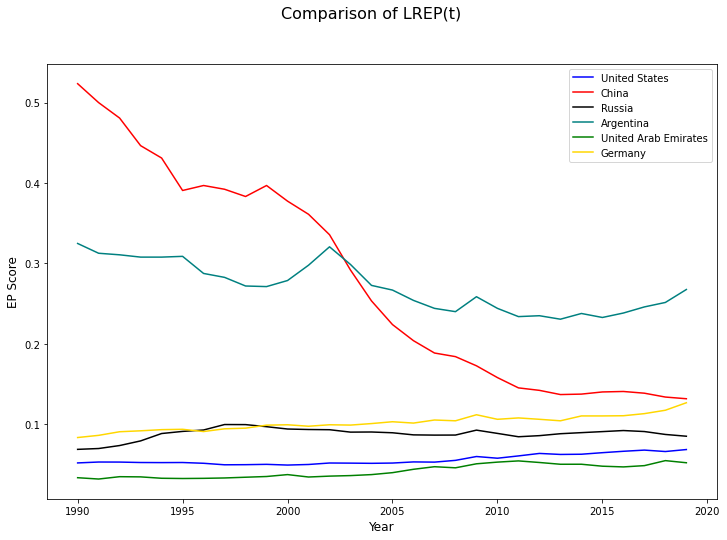

In [83]:
# creating the figure
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(oc_data['Year'],ceot_EP, label="United States", color='blue')
plt.plot(oc_data['Year'],china_ep, label="China", color='red')
plt.plot(oc_data['Year'],russia_ep, label="Russia", color='black')
plt.plot(oc_data['Year'],argentina_ep, label="Argentina", color='teal')
plt.plot(oc_data['Year'],UAE_ep, label="United Arab Emirates", color='green')
plt.plot(oc_data['Year'],germany_ep, label="Germany", color="gold")

plt.legend(loc="best")

fig.suptitle("Comparison of LREP(t)", fontsize=16)
ax.set_ylabel('EP Score', fontsize=12)
ax.set_xlabel('Year', fontsize=12)

What we can tell from the figure:

* The USA, Germany, and even the UAE are generally upward sloping
* China was rapidly damaging the environment overtime but seems to be leveling out
* Argentina and Russia seem to be relatively constant.
    * Argentina seems to be constant but at a level that is more environmentally friendly than all the other countries. This is due to slower economic growth. This can be observed by looking at the AGEP(Y) section of the model.

### Conclusion

The United States is one of the main contributors the carbon in the atmosphere. However, the United States is also a big contributor to economic growth in a direction that aims to sustain. 

The United States is disproportionately affecting the world's carbon emissions if you only pay attention to carbon emissions per capita. However, if you pay attention to the overall trend of the USA economy is geared towards reducing emissions, something you do not see out of other countries such as China or Russia. In this case, the USA is doing more for the planet than the other countries.

This makes sense outside the model. Many American companies aim to have net zero emissions by certain years, and a lot of American technology is made with the intent of limiting emissions produced, most notably in the automotive market. The government steps in by imposing policy such as carbon taxes. Only countries that are more developed have the luxury of imposing these methods. 